In [1]:
import numpy as np
import pandas as pd
import pickle
import importlib

import matplotlib.pyplot as plt
from matplotlib import style

from lightgbm import LGBMClassifier, plot_importance
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn import metrics

import util

# style.use('dark_background')

In [6]:
importlib.reload(util)

<module 'util' from 'C:\\Users\\joey3\\OneDrive\\CS_DS\\Apnea-ECG\\util.py'>

In [2]:
df = pd.read_csv('features/feature_train.csv')
train_df = pd.read_csv('resources/File_train.csv')
feature_col = df.drop(labels=['apn', 'group', 'file'], axis=1).columns

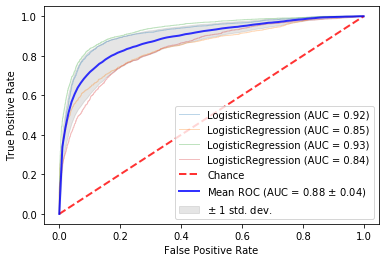

0.8299320740444287


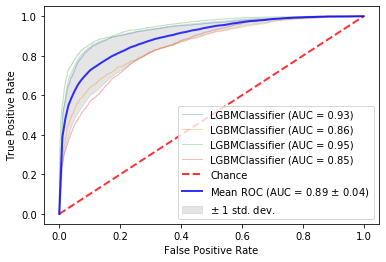

0.8322370333580099


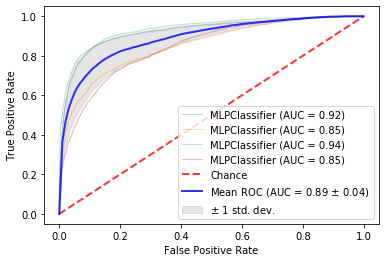

0.8305029007796654


In [3]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
acc_train, acc_val, res_logreg = util.model_evaluation_CV(
    logreg, df, train_df, feature_col, n=4, plot_roc=True)
print(acc_val)

gbm = LGBMClassifier(
    boosting_type='gbdt', num_leaves=31, max_depth=-1, 
    learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, 
    class_weight=None, min_split_gain=0.0, 
    min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
    subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, 
    random_state=123, n_jobs=-1, silent=True, importance_type='split')
acc_train, acc_val, res_gbm = util.model_evaluation_CV(
    gbm, df, train_df, feature_col, n=4, plot_roc=True)
print(acc_val)

mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
acc_train, acc_val, res_mlp = util.model_evaluation_CV(
    mlp, df, train_df, feature_col, n=4, plot_roc=True)
print(acc_val)

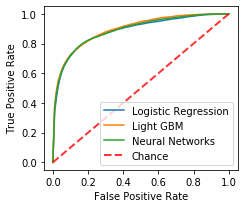

In [6]:
fig, ax = plt.subplots(figsize=(3.5, 3))
ax.plot(res_logreg['mean_fpr'], res_logreg['mean_tpr'], label='Logistic Regression')
ax.plot(res_gbm['mean_fpr'], res_gbm['mean_tpr'], label='Light GBM')
ax.plot(res_mlp['mean_fpr'], res_mlp['mean_tpr'], label='Neural Networks')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    label='Chance', alpha=.8)
ax.set(
    xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], 
    xlabel='False Positive Rate', ylabel='True Positive Rate')
# ax.grid(True)
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()
fig.savefig('archive/Model_ROC.png', dpi=300)

# z_Feature selection
    This leads to overfitting

In [9]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
features_logreg = util.feature_select(logreg, df, train_df, feature_col, n=4)
print(features_logreg)

Baseline accuracy: 0.830
Accuracy using RFE: 0.834
**********************************
Baseline accuracy: 0.830
Accuracy revoming Modified_csi: 0.830
Accuracy revoming acf1_5min: 0.831
Accuracy revoming acf2_1min: 0.831
Accuracy revoming area_ratio: 0.832
Accuracy revoming max_r_1min: 0.832
Accuracy revoming p75_r_1min: 0.832
Accuracy revoming f_peak: 0.833
Accuracy revoming area_total: 0.833
Accuracy revoming p25_r_5min: 0.833
Accuracy revoming median_nni: 0.833
Accuracy revoming p25_r_1min: 0.833
Accuracy revoming csi: 0.834
Accuracy revoming mean_r_1min: 0.834
Accuracy revoming max_hr: 0.834
Accuracy revoming nni_50: 0.835
Accuracy revoming peak: 0.836
Accuracy revoming mean_r_5min: 0.836
Accuracy revoming range_nni: 0.837
['acf1_1min' 'md_5min' 'min_r_1min' 'md_1min' 'pnni_50' 'std_hr'
 'std_5min' 'std_1min' 'sdsd' 'sdnn' 'rmssd' 'pnni_20' 'p75_r_5min'
 'nni_20' 'min_r_5min' 'min_hr' 'mean_nni' 'mean_hr' 'max_r_5min' 'cvsd'
 'cvnni' 'cvi' 'area_lf' 'area_hf' 'acf2_5min']


In [10]:
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
features_mlp = util.feature_select(mlp, df, train_df, feature_col, n=4)
print(features_mlp)

Baseline accuracy: 0.831
Accuracy using RFE: 0.831
**********************************
Baseline accuracy: 0.830
Accuracy revoming Modified_csi: 0.833
Accuracy revoming mean_r_1min: 0.833
Accuracy revoming area_total: 0.833
Accuracy revoming area_ratio: 0.834
['acf2_1min' 'max_r_1min' 'acf1_5min' 'p75_r_1min' 'f_peak' 'p25_r_1min'
 'acf1_1min' 'p25_r_5min' 'csi' 'max_hr' 'mean_r_5min' 'md_5min'
 'min_r_1min' 'md_1min' 'median_nni' 'range_nni' 'nni_50' 'pnni_50'
 'std_hr' 'std_5min' 'std_1min' 'sdsd' 'sdnn' 'rmssd' 'pnni_20' 'peak'
 'p75_r_5min' 'nni_20' 'min_r_5min' 'min_hr' 'mean_nni' 'mean_hr'
 'max_r_5min' 'cvsd' 'cvnni' 'cvi' 'area_lf' 'area_hf' 'acf2_5min']


# z_Optimize threshold for group classification
    This only leads to overfitting!

## MLP

In [11]:
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    random_state=123)
acc_train, acc_val, res_mlp = util.model_evaluation_CV(
    mlp, df, train_df, features_mlp, n=4, detail_pred=True)
acc_val

0.8390325513257786

In [12]:
thresholds = np.arange(0.2, 0.9, 0.01)
score = []
for threshold in thresholds:
    for key, res in res_mlp['seg_pred'].items():
        # Calculate new prediction based on the new threshold
        y_pred = (res[2, :] > threshold).astype(int)
        
        # Patient group diagnosis
        res_mlp['patient_pred'].loc[key, 'pred'] = util.ecg_diagnose(y_pred)
        
    score.append(metrics.f1_score(
        y_true=res_mlp['patient_pred']['true'], 
        y_pred=res_mlp['patient_pred']['pred'], 
        average='weighted'))

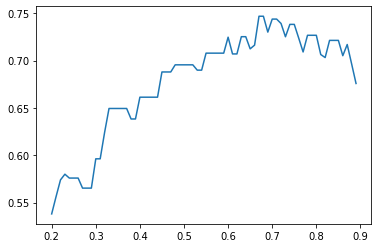

0.6700000000000004


In [13]:
plt.plot(thresholds, score)
plt.show()
threshold_mlp = thresholds[np.argmax(score)]
print(threshold_mlp)

## Logistic Regression

In [15]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
acc_train, acc_val, res_logreg = util.model_evaluation_CV(
    logreg, df, train_df, features_logreg, n=4, detail_pred=True)
acc_val

0.8365740728731544

In [21]:
thresholds = np.arange(0.2, 0.9, 0.01)
score = []
for threshold in thresholds:
    for key, res in res_mlp['seg_pred'].items():
        # Calculate new prediction based on the new threshold
        y_pred = (res[2, :] > threshold).astype(int)
        
        # Patient group diagnosis
        res_mlp['patient_pred'].loc[key, 'pred'] = util.ecg_diagnose(y_pred)
        
    score.append(metrics.f1_score(
        y_true=res_mlp['patient_pred']['true'], 
        y_pred=res_mlp['patient_pred']['pred'], 
        average='weighted',
    ))

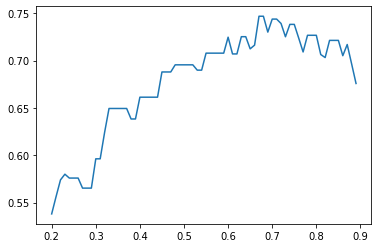

0.6700000000000004


In [22]:
plt.plot(thresholds, score)
plt.show()
threshold_logreg = thresholds[np.argmax(score)]
print(threshold_logreg)

# Model evaluation

## MLP

In [33]:
scaler = preprocessing.StandardScaler().fit(df[feature_col])
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5), 
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=123)
mlp.fit(scaler.transform(df[feature_col]), df['apn'])

test_df = pd.read_csv('resources/File_test.csv')
res_minute = {}
for file in test_df['file']:
    data = pd.read_csv('resources/feature_' + file + '.csv')
    y_pred = mlp.predict(scaler.transform(data[feature_col]))
    y_true = data['apn']
    
    res_minute[file] = np.vstack((y_pred, y_true))
    test_df.loc[test_df['file'] == file, 'pred'] = util.ecg_diagnose(y_pred)

print(metrics.classification_report(test_df['group'], test_df['pred']))

res_minute = np.hstack(list(res_minute.values()))
print(metrics.classification_report(res_minute[0, :], res_minute[1, :]))

              precision    recall  f1-score   support

           A       1.00      0.62      0.77         8
           B       0.29      1.00      0.44         2
           C       1.00      0.50      0.67         4

    accuracy                           0.64        14
   macro avg       0.76      0.71      0.63        14
weighted avg       0.90      0.64      0.69        14

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      5161
           1       0.54      0.77      0.63      1665

    accuracy                           0.78      6826
   macro avg       0.73      0.78      0.74      6826
weighted avg       0.82      0.78      0.79      6826



## Logistic Regression

In [7]:
scaler = preprocessing.StandardScaler().fit(df[feature_col])
logreg = LogisticRegression(solver='lbfgs', max_iter=1e6)
logreg.fit(scaler.transform(df[feature_col]), df['apn'])

test_df = pd.read_csv('resources/File_test.csv')
res_minute = {}
for file in test_df['file']:
    data = pd.read_csv('resources/feature_' + file + '.csv')
    y_pred = logreg.predict(scaler.transform(data[feature_col]))
    y_true = data['apn']
    
    res_minute[file] = np.vstack((y_pred, y_true))
    test_df.loc[test_df['file'] == file, 'pred'] = util.ecg_diagnose(y_pred)

print(metrics.classification_report(test_df['group'], test_df['pred']))

res_minute = np.hstack(list(res_minute.values()))
print(metrics.classification_report(res_minute[0, :], res_minute[1, :]))

# res = {'mdl': logreg, 'scaler': scaler}
# with open('resources/model_logreg.pkl', 'wb') as f:
#     pickle.dump(res, f)

              precision    recall  f1-score   support

           A       1.00      0.62      0.77         8
           B       0.33      1.00      0.50         2
           C       1.00      0.75      0.86         4

    accuracy                           0.71        14
   macro avg       0.78      0.79      0.71        14
weighted avg       0.90      0.71      0.76        14

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      5297
           1       0.48      0.75      0.59      1529

    accuracy                           0.77      6826
   macro avg       0.70      0.76      0.71      6826
weighted avg       0.82      0.77      0.78      6826



In [21]:
temp_df = test_df.drop('file', axis=1)
temp_df.rename(columns={'group': 'True', 'pred': 'Pred'}, inplace=True)
temp_df.replace({'A': 'Severe', 'B': 'Moderate', 'C': 'Safe'}, inplace=True)
temp_df

,True,Pred
0,Moderate,Moderate
1,Severe,Moderate
2,Severe,Severe
3,Severe,Severe
4,Safe,Safe
5,Safe,Moderate
6,Moderate,Moderate
7,Safe,Safe
8,Safe,Safe
9,Severe,Severe


In [34]:
df['apn'].value_counts()

0    16257
1    10583
Name: apn, dtype: int64

In [40]:
temp = np.hstack(list(res_logreg['seg_pred'].values()))
print(metrics.classification_report(temp[0, :], temp[1, :]))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     16257
         1.0       0.83      0.73      0.78     10583

    accuracy                           0.84     26840
   macro avg       0.84      0.82      0.82     26840
weighted avg       0.84      0.84      0.83     26840

